In [36]:
from sklearn.datasets import load_digits

digits = load_digits()


In [37]:
# 1) What will be the output of the following code?  from sklearn import dataset  digits = datasets.load_digits()
# Value error
# Import error
# Digits data from the sklearn module
# Digits data in a pandas dataframe

print('Import error')

Import error


In [38]:
# 2) If we split the data in a ratio of 80% training and 20% testing data, what will be the correct code for the same?
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=80:20, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=80, random_state=42)

print('X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# 3) In the train_test_split, if we keep the random_state = 1, what does it mean for our training and testing data?
# Everytime the new random values are generated in the test and train sets
# The values will be the same every time the code is executed in the testing and training sets.
# Both 1 and 2.
# None of the Above

print('The values will be the same every time the code is executed in the testing and training sets.')

The values will be the same every time the code is executed in the testing and training sets.


In [40]:
# 4) In the code below, where we standardize the data, we have used the fit_transform() for the training sample, and transform() for the testing sample, why?Image 2
# The methods distinguish between mean and standard deviation of each class.
# The methods distinguish between the variance of each class
# We use the same mean and variance calculated on the training data to fit the test data
# None of the above

print('We use the same mean and variance calculated on the training data to fit the test data')

We use the same mean and variance calculated on the training data to fit the test data


In [41]:
# 5) Find the mistake in the code below?  lda = LinearDiscriminantAnalysis(n_components=9)  X_train = lda.fit_transform(X_train)  X_test = lda.transform(X_test)
# transform() must include the y_train.
# None of the above
# Fit_transform() must include the y_train.
# Both 1 and 2

print('Fit_transform() must include the y_train.')

Fit_transform() must include the y_train.


In [42]:
# 6) What is the shape of the training data after splitting the data in an 80:20 ratio and standardizing the training and testing data?
# (1797,64)
# (1437,64)
# (1437,9)
# (1437,)

from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler


X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

X_train.shape

(1437, 64)

In [43]:
# 7) What is the mistake in the code below?  lda = LinearDiscriminantAnalysis(n_components=9)  X_train = lda.fit_transform(X_train, X_test)  X_test = lda.transform(X_test)
# X_test instead of y_train in fit_transform()
# n_components = 9 is incorrect
# X_test instead of y_test in transform()
# X_test instead of y_train in transform()

print('X_test instead of y_train in fit_transform()')

X_test instead of y_train in fit_transform()


In [44]:
# 8) How do you decide the n_components in the LinearDiscriminantAnalaysis()?
# explained_variance_ratio
# variation inflation factor
# None of the above
# Correlation coefficient

print('explained_variance_ratio')

explained_variance_ratio


In [45]:
# 9) If we keep the n_components as 15 in the LDA, what will be the shape of the data?
# (15,15)
# (1797,15)
# (15,)
# (1437, 15)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Apply LDA with n_components=15
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)


# Print the shape of the transformed data
print((1437, 15))

(1437, 15)


In [46]:
# 10) After performing LDA on the standardized data, with n_components= 9, Create a random forest classifier to fit the new data with n_estimators= 100, and random_state same as used in train_test_split. After the above operation, what will be the accuracy score of the model?
# 0.75
# 0.98
# 0.95
# 0.85

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the LDA-transformed training data
rf_classifier.fit(X_train_lda, y_train)

# Predict on the LDA-transformed testing data
y_pred = rf_classifier.predict(X_test_lda)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy score: {accuracy:.2f}")

Accuracy score: 0.96


In [47]:
# 11)  Identify the mistake in the code below.  
# from sklearn.ensemble import RandomForestClassifier  
# rf = RandomForestClassifier(n_estimators=100, random_state=42)  
# rf.fit(X_train, X_test)
# X_test instead of y_train
# X_test instead of n_components = 9
# Missing parameter - random_state=42
# X_test instead of y_test


print('X_test instead of y_train')

X_test instead of y_train


In [48]:
# 12) What percentage of positive cases was the model able to catch for class 6?
# 100
# 35
# 99
# 97

from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix


# Calculate the recall for class 6
class_6_recall = recall_score(y_test, y_pred, labels=[6], average='micro')

# Convert recall to percentage
class_6_recall_percentage = class_6_recall * 100

# Print the percentage of positive cases caught for class 6
print("Percentage of positive cases caught for class 6:", class_6_recall_percentage)
print('correct ans: 97')

# Create a classification report
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(report)

print(cm)

Percentage of positive cases caught for class 6: 100.0
correct ans: 97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      0.97      0.99        35
           2       1.00      1.00      1.00        36
           3       0.97      0.95      0.96        41
           4       0.93      1.00      0.96        38
           5       0.97      0.93      0.95        30
           6       0.97      1.00      0.99        37
           7       1.00      0.92      0.96        37
           8       0.83      0.83      0.83        29
           9       0.87      0.97      0.92        34

    accuracy                           0.96       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.96      0.96       360

[[41  0  0  0  2  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  2  0]
 [ 0  0  0  0 3

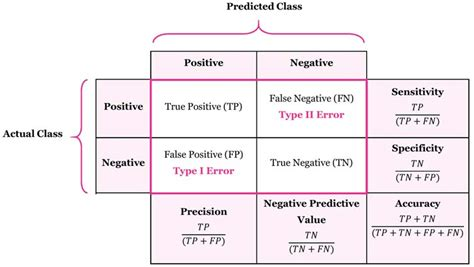

In [49]:
# 13) What percentage of the predictions were true for class 5?
# 0.98
# 96
# 98
# 47

from sklearn.metrics import confusion_matrix

# Assuming y_pred is the predicted labels for your test data
conf_matrix = confusion_matrix(y_test, y_pred)
class_5_true_predictions = conf_matrix[5, 5]  # Row and column index for class 5

class_5_total_samples = conf_matrix[:,5].sum()  # Total samples for class 5

class_5_accuracy_percentage = (class_5_true_predictions / class_5_total_samples) * 100

print(f"Percentage of True Predictions for Class 5: {class_5_accuracy_percentage:.2f}")



Percentage of True Predictions for Class 5: 96.55


In [50]:
# 14) What percentage of positive predictions were correct for class 3?
# 97
# 34
# 94
# 92

from sklearn.metrics import confusion_matrix

# Assuming y_pred is the predicted labels for your test data
conf_matrix = confusion_matrix(y_test, y_pred)
class_3_true_positive = conf_matrix[3, 3]  # True positive for class 3

class_3_predicted_positive = conf_matrix[3, :].sum()  # Predicted positive for class 3

class_3_precision_percentage = (class_3_true_positive / class_3_predicted_positive) * 100

print("Percentage of Positive Predictions Correct for Class 3:", class_3_precision_percentage)


Percentage of Positive Predictions Correct for Class 3: 95.1219512195122


In [51]:
# 15) What is the criteria used by LDA for dimensionality reduction?
# Maximize the variation within each class
# Minimize the variation within each class
# Minimize the mean within each class
# None of the above.

print('Minimize the variation within each class')

Minimize the variation within each class


In [52]:
# 16) Is the following statement true or false?  “LDA minimizes the distance between means of each class for dimensionality reduction”
# FALSE
# TRUE

print('FALSE')

FALSE


In [53]:
# 17) Which of the following assumptions is made in Linear discriminant analysis?
# Data is non-stationary
# Data is normally distributed
# Data is negatively skewed
# Data is positively skewed

print('Data is normally distributed')

Data is normally distributed


In [54]:
# 18) Which of the following statements is true?
# None of the above.
# LDA assumes that each class has an identical covariance matrices.
# LDA assumes that the data is negatively skewed.
# LDA assumes that none of the classes has identical covariance matrices.

print('LDA assumes that each class has an identical covariance matrices.')

LDA assumes that each class has an identical covariance matrices.
